In [1]:
import pandas as pd
import numpy as np
import os
import json
import math
import itertools as it
from sklearn.cluster import KMeans
from sklearn import decomposition
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# for i in os.listdir('/./Users/ext_charlesl/TrendMicro-malware-dataset'):
#     print 'wang/%s' % (i)

In [3]:
path = '/./Users/Mac/Downloads/Malware/TrendMicro-malware-dataset/'
new_list = []
feats=[]
lbs=[]




for i in os.listdir(path):
    if 'info' in os.listdir(path +i):
        with open (path + i+'/info') as f:
            dataa = json.load(f)
            dataa['sha1']=i
            new_list.append(dataa)
            

In [4]:
pddict = {}
for i in new_list:
    for k in i.keys():
        k = k.encode('ascii','ignore')
        if k not in pddict:
            pddict[k] = []

In [5]:
for i in new_list:
    for k in i.keys():
        k = k.encode('ascii','ignore')
        if k in pddict:
            pddict[k].append(i[k])
df = pd.DataFrame.from_dict(pddict,orient='index').T
df

,DllCharacteristics,TimeDateStamp,BaseOfCode,FileDescription,FileEntropy,ImageVersion,LoaderFlags,SizeOfStackCommit,SizeOfUninitializedData,SizeOfHeapReserve,...,sha1,CompanyName,ImageBase,SizeOfInitializedData,NumberOfSymbols,ProductName,SizeOfImage,NumberOfRvaAndSizes,FileSize,Characteristics
0,0x8140,1437144778,0x1000,Remote Service Application,7.68052,16.0,0x0,4096,0,1048576,...,00034ba766f8721f43999bbfa341969fac85fdfe,,0x400000,491520,0,Remote Service Application,684032,16,642768,0x102
1,0x0,2099200,0x1000,Remote Service Application,7.87682,0.0,0x0,4096,65536,1048576,...,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,0x400000,43008,0,Remote Service Application,155648,16,63488,0x10f
2,0x0,1334513212,0x1000,Microsoft® Forms DLL,6.23176,0.0,0x0,16384,0,1048576,...,00141e38f00072e8854a8aeec7028456e54eb341,,0x400000,86016,0,Microsoft® Forms,745472,16,745473,0x818e
3,0x8140,1434638403,0x1000,Remote Service Application,7.58456,16.0,0x0,4096,0,1048576,...,0019d715f0f3ab076ba01946ab33b510d697a204,,0x400000,558592,0,Remote Service Application,749568,16,710864,0x102
4,0x8140,1434638134,0x1000,MDM Device Interface for Rio 800 device.,7.71758,16.0,0x0,4096,0,1048576,...,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,0x400000,534016,0,Diamond Rio800,745472,16,686296,0x102
5,0x0,1339084793,0x1000,Remote Service Application,6.61789,0.0,0x0,16384,0,1048576,...,001c5920be0447c52c77b5673121f91167dae3e0,,0x400000,86528,0,Remote Service Application,729088,16,674304,0x818e
6,0x8040,1328307148,0x1000,Remote Service Application,6.39373,5.1,0x0,4096,0,1048576,...,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,Microsoft Corp.,0x400000,185856,0,Remote Service Application,479232,16,463560,0x102
7,0x0,969768308,0x1000,Remote Service Application,7.75624,0.0,0x0,4096,0,1048576,...,0025b66c923168bf934d6ea74f64cd68511cfc18,,0x400000,128000,0,Remote Service Application,372736,16,196589,0x10f
8,0x8140,1434696550,0x1000,WriteDogLimitTime Microsoft 基础类应用程序,7.66242,16.0,0x0,4096,0,1048576,...,002f2ea80a675231c4392c5b338a9710d4463b7b,,0x400000,547840,0,WriteDogLimitTime 应用程序,733184,16,700112,0x102
9,0x8040,1375877276,0x1000,TODO: <파일 설명>,6.38446,5.1,0x0,4096,0,1048576,...,003dce457da9125e95f71d6df3b7224183228ce6,,0x400000,185856,0,TODO: <제품 이름>,479232,16,461312,0x102


In [7]:
df.describe(include=['O']).iloc[:,:18]

,DllCharacteristics,TimeDateStamp,BaseOfCode,FileDescription,FileEntropy,ImageVersion,LoaderFlags,SizeOfStackCommit,SizeOfUninitializedData,SizeOfHeapReserve,LinkerVersion,SizeOfHeapCommit,SizeOfStackReserve,OperatingSystemVersion,SizeOfHeaders,Subsystem,FileVersion,LegalCopyright
count,17952,17952,17952,5672,17952.000000,17952,17952,17952,17952,17952,17952,17952,17952,17952,17952,17952,8204,5633
unique,22,8483,205,1454,17952.000000,30,5,17,214,12,53,9,26,14,11,4,2958,951
top,0x0,1339084793,0x1000,Remote Service Application,7.886978,0.0,0x0,4096,0,1048576,11.0,4096,1048576,4.0,1024,0x2,"1, 0, 0, 1",Copyright (C) 1999
freq,8923,1946,16929,2331,1.000000,12396,17929,14987,14468,17808,3840,17932,14869,8821,14499,17375,2733,2358


In [8]:
df.describe(include=['O']).iloc[:,18:]

,NumberOfSections,FileAlignment,ProductVersion,SubsystemVersion,BaseOfData,SizeOfOptionalHeader,AddressOfEntryPoint,SectionAlignment,SizeOfCode,sha1,CompanyName,ImageBase,SizeOfInitializedData,NumberOfSymbols,ProductName,SizeOfImage,NumberOfRvaAndSizes,FileSize,Characteristics
count,17952,17952,8138,17952,17950,17952,17952,17952,17952,17952,7861,17952,17952,17952,5614,17952,17952,17952,17952
unique,18,4,2832,13,441,7,4221,4,919,17952,775,22,1328,16,1256,921,6,5813,35
top,5,0x200,"4, 0, 0, 0",4.0,0x5000,224,0x8f888,0x1000,13824,124b6bfffc342ec9f850d51d3363918e4e44f569,Microsoft Corp.,0x400000,43008,0,Remote Service Application,147456,16,63488,0x102
freq,7733,15562,2336,9252,1963,17934,1573,17877,1870,1,2332,17172,1844,17935,2330,1287,17943,1090,8189


In [9]:
dfdes = df.describe(include=['O'])

In [10]:
dfdes.loc['freq',:] < 10000

DllCharacteristics          True
TimeDateStamp               True
BaseOfCode                 False
FileDescription             True
FileEntropy                 True
ImageVersion               False
LoaderFlags                False
SizeOfStackCommit          False
SizeOfUninitializedData    False
SizeOfHeapReserve          False
LinkerVersion               True
SizeOfHeapCommit           False
SizeOfStackReserve         False
OperatingSystemVersion      True
SizeOfHeaders              False
Subsystem                  False
FileVersion                 True
LegalCopyright              True
NumberOfSections            True
FileAlignment              False
ProductVersion              True
SubsystemVersion            True
BaseOfData                  True
SizeOfOptionalHeader       False
AddressOfEntryPoint         True
SectionAlignment           False
SizeOfCode                  True
sha1                        True
CompanyName                 True
ImageBase                  False
SizeOfInit

In [11]:
dfdes1 = dfdes.loc[:,dfdes.loc['freq',:] < 10000]

In [13]:
dfiuse.describe(include = ['O']).iloc[:,:10]

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion
count,17952,17952,5672,17952.000000,17952,17952,8204,5633,17952,8138
unique,22,8483,1454,17952.000000,53,14,2958,951,18,2832
top,0x0,1339084793,Remote Service Application,7.886978,11.0,4.0,"1, 0, 0, 1",Copyright (C) 1999,5,"4, 0, 0, 0"
freq,8923,1946,2331,1.000000,3840,8821,2733,2358,7733,2336


In [14]:
dfiuse.describe(include = ['O']).iloc[:,10:]

,SubsystemVersion,BaseOfData,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics
count,17952,17950,17952,17952,17952,7861,17952,5614,17952,17952,17952
unique,13,441,4221,919,17952,775,1328,1256,921,5813,35
top,4.0,0x5000,0x8f888,13824,124b6bfffc342ec9f850d51d3363918e4e44f569,Microsoft Corp.,43008,Remote Service Application,147456,63488,0x102
freq,9252,1963,1573,1870,1,2332,1844,2330,1287,1090,8189


# Turn objects to floats (for versions and continuous value)

In [15]:
floatcol = ['TimeDateStamp','FileEntropy','LinkerVersion','OperatingSystemVersion','NumberOfSections','SubsystemVersion'\
           ,'SizeOfInitializedData','SizeOfImage','FileSize','SizeOfCode']
for i in floatcol:
    dfiuse[i] = dfiuse[i].astype('float')
dfiuse

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion,...,BaseOfData,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics
0,0x8140,1.437145e+09,Remote Service Application,7.680524,12.00,5.1,"1, 0, 0, 1",Copyright (C) 1999,5.0,"4, 0, 0, 0",...,0x24000,0x11534,143360.0,00034ba766f8721f43999bbfa341969fac85fdfe,,491520.0,Remote Service Application,684032.0,642768.0,0x102
1,0x0,2.099200e+06,Remote Service Application,7.876825,5.12,4.0,"1, 0, 0, 1",Copyright (C) 1999,3.0,"4, 0, 0, 0",...,0x5000,0x1a2b,13824.0,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,43008.0,Remote Service Application,155648.0,63488.0,0x10f
2,0x0,1.334513e+09,Microsoft® Forms DLL,6.231758,2.25,4.0,1.00.4211.0,Unpublished work. Copyright© Microsoft Corp. 1...,9.0,1.00.4211.0,...,0x92000,0x90888,588800.0,00141e38f00072e8854a8aeec7028456e54eb341,,86016.0,Microsoft® Forms,745472.0,745473.0,0x818e
3,0x8140,1.434638e+09,Remote Service Application,7.584560,12.00,5.1,"1, 0, 0, 1",Copyright (C) 1999,6.0,"4, 0, 0, 0",...,0x25000,0x118b4,144384.0,0019d715f0f3ab076ba01946ab33b510d697a204,,558592.0,Remote Service Application,749568.0,710864.0,0x102
4,0x8140,1.434638e+09,MDM Device Interface for Rio 800 device.,7.717577,12.00,5.1,1.0.5701.28223,Copyright © 2000 - 2001 S3/Diamond Multimedia,5.0,1.0.5701.28223,...,0x25000,0x118b4,144384.0,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,534016.0,Diamond Rio800,745472.0,686296.0,0x102
5,0x0,1.339085e+09,Remote Service Application,6.617888,2.25,4.0,1.0.5702.17415,Copyright (C) 1999,9.0,1.0.5702.17415,...,0x91000,0x8f888,586752.0,001c5920be0447c52c77b5673121f91167dae3e0,,86528.0,Remote Service Application,729088.0,674304.0,0x818e
6,0x8040,1.328307e+09,Remote Service Application,6.393731,11.00,5.1,1.0.5705.8414,Copyright (C) 1999,5.0,1.0.5705.8414,...,0x47000,0x40a3b,285696.0,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,Microsoft Corp.,185856.0,Remote Service Application,479232.0,463560.0,0x102
7,0x0,9.697683e+08,Remote Service Application,7.756242,7.10,4.0,1.0.2.1,Copyright (C) 1999,6.0,1.0.2.1,...,0x9000,0x42000,29696.0,0025b66c923168bf934d6ea74f64cd68511cfc18,,128000.0,Remote Service Application,372736.0,196589.0,0x10f
8,0x8140,1.434697e+09,WriteDogLimitTime Microsoft 基础类应用程序,7.662417,12.00,5.1,1.0.5702.3001,版权所有 (C) 2007,6.0,1.0.5702.3001,...,0x25000,0x118b4,144384.0,002f2ea80a675231c4392c5b338a9710d4463b7b,,547840.0,WriteDogLimitTime 应用程序,733184.0,700112.0,0x102
9,0x8040,1.375877e+09,TODO: <파일 설명>,6.384455,11.00,5.1,"1, 0, 0, 1",TODO: (c) <회사 이름>. All rights reserved.,5.0,"4, 0, 0, 0",...,0x47000,0x40b9b,285696.0,003dce457da9125e95f71d6df3b7224183228ce6,,185856.0,TODO: <제품 이름>,479232.0,461312.0,0x102


# Normalization

In [16]:
cols_to_norm = ['TimeDateStamp','FileEntropy','OperatingSystemVersion','NumberOfSections','SubsystemVersion'\
           ,'SizeOfInitializedData','SizeOfImage','FileSize','SizeOfCode']
dfiuse[cols_to_norm] = dfiuse[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# DllCharacteristics

In [18]:
df.DllCharacteristics.value_counts()

0x0       8923
0x8140    5566
0x8040    2540
0x8000     609
0x8800     172
0x8100      34
0x8540      29
0x8400      20
0x400       20
0x8440      14
0x8500       6
0x140        4
0x8300       3
0x100        2
0x35         2
0x1          2
0x40         1
0x8012       1
0x8200       1
0xc140       1
0x540        1
0x1100       1
Name: DllCharacteristics, dtype: int64

# TimeDateStamp

In [22]:
# Timenorm = ['Age','Height']
# survey_data[cols_to_norm] = survey_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# FileDescription 

In [23]:
df.FileDescription.value_counts()

Remote Service Application                               2331
copymar                                                   157
                                                           68
globalUpdate Update                                        61
MDM Device Interface for Rio 800 device.                   48
360安全桌面 WEBAPP                                             46
Microsoft (r) VBScript                                     45
Internet Ratings and Local User Management DLL             40
nfapinet2                                                  33
Age of Empires                                             30
Microsoft® HTML Editing Component's Resource DLL           27
易语言程序                                                      26
NewServe 应用程序                                              25
Age of Empires, the Rise of Rome                           25
Wired AutoConfig Service                                   22
Shell Doc Object and Control Library                       21
Windows 

# FileEntropy

In [24]:
max(df.FileEntropy)

7.9993660639518405

[5, 16, 0, 2]

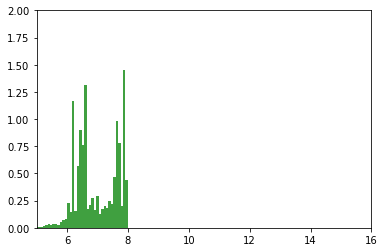

In [25]:
n, bins, patches = plt.hist(df.FileEntropy, 100, normed=1, facecolor='green', alpha=0.75)
plt.axis([5,16, 0,2])

# LinkerVersion

In [26]:
df.LinkerVersion.value_counts()

11.0      3840
12.0      3831
6.0       2758
2.25      2645
5.12      2474
9.0        596
8.0        522
7.10       262
10.0       235
6.20       172
0.0        137
5.0        102
7.0         93
4.20        46
1.0         45
8.12        37
5.10        24
6.4         23
2.50        22
4.1         12
3.0         10
2.56         8
4.0          6
7.4          5
3.10         4
2.52         3
0.1          3
10.10        3
5.2          3
2.24         2
3.189        2
1.71         2
9.2          2
7.1          2
2.0          2
83.82        2
5.3          1
6.1          1
2.60         1
12.10        1
2.30         1
154.2        1
76.111       1
2.111        1
8.1          1
12.11        1
6.15         1
25.17        1
0.50         1
1.50         1
4.21         1
6.27         1
7.80         1
Name: LinkerVersion, dtype: int64

In [27]:
dfiuse.head()

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion,...,BaseOfData,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics
0,0x8140,0.374273,Remote Service Application,0.960093,12.00,0.51,"1, 0, 0, 1",Copyright (C) 1999,0.20,"4, 0, 0, 0",...,0x24000,0x11534,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,,0.000122,Remote Service Application,0.004538,0.021386,0x102
1,0x0,0.000547,Remote Service Application,0.984663,5.12,0.40,"1, 0, 0, 1",Copyright (C) 1999,0.10,"4, 0, 0, 0",...,0x5000,0x1a2b,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,0.000011,Remote Service Application,0.001033,0.001989,0x10f
2,0x0,0.347545,Microsoft® Forms DLL,0.778764,2.25,0.40,1.00.4211.0,Unpublished work. Copyright© Microsoft Corp. 1...,0.40,1.00.4211.0,...,0x92000,0x90888,0.000333,00141e38f00072e8854a8aeec7028456e54eb341,,0.000021,Microsoft® Forms,0.004945,0.024825,0x818e
3,0x8140,0.373621,Remote Service Application,0.948082,12.00,0.51,"1, 0, 0, 1",Copyright (C) 1999,0.25,"4, 0, 0, 0",...,0x25000,0x118b4,0.000082,0019d715f0f3ab076ba01946ab33b510d697a204,,0.000138,Remote Service Application,0.004973,0.023666,0x102
4,0x8140,0.373621,MDM Device Interface for Rio 800 device.,0.964731,12.00,0.51,1.0.5701.28223,Copyright © 2000 - 2001 S3/Diamond Multimedia,0.20,1.0.5701.28223,...,0x25000,0x118b4,0.000082,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,0.000132,Diamond Rio800,0.004945,0.022843,0x102


# OperatingSystemVersion (分兩好) 5以上 4以下

In [29]:
df.OperatingSystemVersion.value_counts()

4.0     8821
5.1     7932
5.0      868
6.0      129
0.0       99
5.2       40
1.0       32
6.1       19
6.3        5
4.1        2
6.2        2
4.14       1
8.0        1
10.0       1
Name: OperatingSystemVersion, dtype: int64

# FileVersion

In [30]:
df.FileVersion.value_counts()

1, 0, 0, 1                                                       2733
6.10.0016.1624                                                    172
1.0.0.0                                                           121
8.00.6001.18702 (longhorn_ie8_rtm(wmbla).090308-0339)              66
1.3.25.0                                                           61
1.0.0.1                                                            52
1.0.2.1                                                            48
1, 0, 1, 1096                                                      46
5.5.0.7426                                                         45
7.00.5730.13 (longhorn(wmbla).070711-1130)                         34
11.0.5721.5262 (WMP_11.090130-1421)                                33
00.09.13.0409                                                      30
10.0.10240.16384 (th1.150709-1700)                                 27
11.0.5721.5145 (WMP_11.061018-2006)                                26
00.04.2.0901        

# NumberOfSections （Normalized）

In [31]:
df.NumberOfSections.value_counts()

5     7733
3     3342
9     2085
6     1854
4     1663
7      800
8      226
2      102
10      76
11      34
17      11
13      10
12       8
1        4
19       1
14       1
15       1
21       1
Name: NumberOfSections, dtype: int64

# ProductVersion 

In [32]:
df.ProductVersion.value_counts()

4, 0, 0, 0                                                       2336
1, 0, 0, 1                                                        411
6.10.0016.1624                                                    172
1.0.0.0                                                           138
8.00.6001.18702                                                    66
1.3.25.0                                                           61
1.0.0.1                                                            51
1.0.2.1                                                            48
1, 0, 1, 1096                                                      46
5.5.0.7426                                                         45
11.0.5721.5262                                                     35
1.0                                                                35
7.00.5730.13                                                       34
1.0b                                                               30
10.0.10240.16384    

# BaseOfData

In [33]:
df.BaseOfData.value_counts()

0x5000      1963
0x91000     1611
0x25000     1585
0x14000     1254
0x23000      988
0x3000       931
0x47000      486
0x24000      424
0xd000       372
0x4c000      326
0x48000      287
0xe000       282
0x6000       266
0x26000      235
0x11000      233
0xef000      227
0x4b000      225
0x92000      207
0xb6000      200
0xbd000      189
0x27000      176
0x13000      166
0x4000       165
0x6c000      160
0xe5000      158
0x2000       151
0x4d000      145
0x10000      130
0x7000       127
0x0          124
            ... 
0x141000       1
0x490000       1
0xb2000        1
0xc63000       1
0x16e000       1
0xacd000       1
0x2a3000       1
0x26a000       1
0x3e2000       1
0x1ef000       1
0x107000       1
0x17e000       1
0x1b4000       1
0xfb000        1
0x492000       1
0x4bb000       1
0x652000       1
0x157000       1
0x187000       1
0x5b3000       1
0x1a9000       1
0xd8000        1
0x296000       1
0x188000       1
0x35b000       1
0x15c000       1
0x108000       1
0x1d7000      

# SubSystemVersion

In [34]:
df.SubsystemVersion.value_counts()

4.0        9252
5.1        7971
5.0         679
6.0          26
6.1           6
4.65280       4
3.10          3
4.1           2
3.51          2
4.10          2
6.2           2
5.2           2
0.0           1
Name: SubsystemVersion, dtype: int64

In [35]:
dfiuse

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion,...,BaseOfData,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics
0,0x8140,0.374273,Remote Service Application,0.960093,12.00,0.51,"1, 0, 0, 1",Copyright (C) 1999,0.20,"4, 0, 0, 0",...,0x24000,0x11534,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,,0.000122,Remote Service Application,0.004538,0.021386,0x102
1,0x0,0.000547,Remote Service Application,0.984663,5.12,0.40,"1, 0, 0, 1",Copyright (C) 1999,0.10,"4, 0, 0, 0",...,0x5000,0x1a2b,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,0.000011,Remote Service Application,0.001033,0.001989,0x10f
2,0x0,0.347545,Microsoft® Forms DLL,0.778764,2.25,0.40,1.00.4211.0,Unpublished work. Copyright© Microsoft Corp. 1...,0.40,1.00.4211.0,...,0x92000,0x90888,0.000333,00141e38f00072e8854a8aeec7028456e54eb341,,0.000021,Microsoft® Forms,0.004945,0.024825,0x818e
3,0x8140,0.373621,Remote Service Application,0.948082,12.00,0.51,"1, 0, 0, 1",Copyright (C) 1999,0.25,"4, 0, 0, 0",...,0x25000,0x118b4,0.000082,0019d715f0f3ab076ba01946ab33b510d697a204,,0.000138,Remote Service Application,0.004973,0.023666,0x102
4,0x8140,0.373621,MDM Device Interface for Rio 800 device.,0.964731,12.00,0.51,1.0.5701.28223,Copyright © 2000 - 2001 S3/Diamond Multimedia,0.20,1.0.5701.28223,...,0x25000,0x118b4,0.000082,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,0.000132,Diamond Rio800,0.004945,0.022843,0x102
5,0x0,0.348736,Remote Service Application,0.827093,2.25,0.40,1.0.5702.17415,Copyright (C) 1999,0.40,1.0.5702.17415,...,0x91000,0x8f888,0.000332,001c5920be0447c52c77b5673121f91167dae3e0,,0.000021,Remote Service Application,0.004837,0.022442,0x818e
6,0x8040,0.345929,Remote Service Application,0.799037,11.00,0.51,1.0.5705.8414,Copyright (C) 1999,0.20,1.0.5705.8414,...,0x47000,0x40a3b,0.000162,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,Microsoft Corp.,0.000046,Remote Service Application,0.003179,0.015385,0x102
7,0x0,0.252555,Remote Service Application,0.969570,7.10,0.40,1.0.2.1,Copyright (C) 1999,0.25,1.0.2.1,...,0x9000,0x42000,0.000017,0025b66c923168bf934d6ea74f64cd68511cfc18,,0.000032,Remote Service Application,0.002473,0.006446,0x10f
8,0x8140,0.373636,WriteDogLimitTime Microsoft 基础类应用程序,0.957827,12.00,0.51,1.0.5702.3001,版权所有 (C) 2007,0.25,1.0.5702.3001,...,0x25000,0x118b4,0.000082,002f2ea80a675231c4392c5b338a9710d4463b7b,,0.000135,WriteDogLimitTime 应用程序,0.004864,0.023306,0x102
9,0x8040,0.358318,TODO: <파일 설명>,0.797876,11.00,0.51,"1, 0, 0, 1",TODO: (c) <회사 이름>. All rights reserved.,0.20,"4, 0, 0, 0",...,0x47000,0x40b9b,0.000162,003dce457da9125e95f71d6df3b7224183228ce6,,0.000046,TODO: <제품 이름>,0.003179,0.015310,0x102


In [37]:
dfiuse = dfiuse.drop(['DllCharacteristics','FileDescription','FileVersion','LegalCopyright','ProductVersion'\
                    ,'BaseOfData','AddressOfEntryPoint','CompanyName','ProductName','Characteristics','LinkerVersion'],axis = 1)

In [38]:
dfiuse.values

array([[0.37427340475272614, 0.9600933493390408, 0.51, ...,
        0.00012156329639391978, 0.004537796858866366, 0.021385719425610714],
       [0.0005466914282291765, 0.9846625943350584, 0.4, ...,
        1.0636788434467981e-05, 0.001032552578664203, 0.0019887213595176736],
       [0.34754522382764186, 0.7787642707201625, 0.4, ...,
        2.1273576868935962e-05, 0.00494538340307592, 0.024824762179336178],
       ..., 
       [0.3762952671632635, 0.8352235773832847, 0.51, ...,
        8.585407807820584e-05, 0.013667735449160372, 0.0681108938514282],
       [0.3734100588779454, 0.8347385096419071, 0.51, ...,
        7.040540916147854e-05, 0.009428835389381012, 0.04639263819498892],
       [0.3761234072957971, 0.7756085129230463, 0.51, ...,
        1.3675870844315976e-05, 0.0009782077061029292, 0.004156920535694404]], dtype=object)

In [39]:
dfiuse.head()

,TimeDateStamp,FileEntropy,OperatingSystemVersion,NumberOfSections,SubsystemVersion,SizeOfCode,sha1,SizeOfInitializedData,SizeOfImage,FileSize
0,0.374273,0.960093,0.51,0.20,0.822581,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,0.000122,0.004538,0.021386
1,0.000547,0.984663,0.40,0.10,0.645161,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,0.000011,0.001033,0.001989
2,0.347545,0.778764,0.40,0.40,0.645161,0.000333,00141e38f00072e8854a8aeec7028456e54eb341,0.000021,0.004945,0.024825
3,0.373621,0.948082,0.51,0.25,0.822581,0.000082,0019d715f0f3ab076ba01946ab33b510d697a204,0.000138,0.004973,0.023666
4,0.373621,0.964731,0.51,0.20,0.822581,0.000082,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,0.000132,0.004945,0.022843


In [40]:
dftest = dfiuse.drop(['sha1'],axis = 1)

In [41]:
ffeat = dftest.values

In [42]:
ffeat

array([[  3.74273405e-01,   9.60093349e-01,   5.10000000e-01, ...,
          1.21563296e-04,   4.53779686e-03,   2.13857194e-02],
       [  5.46691428e-04,   9.84662594e-01,   4.00000000e-01, ...,
          1.06367884e-05,   1.03255258e-03,   1.98872136e-03],
       [  3.47545224e-01,   7.78764271e-01,   4.00000000e-01, ...,
          2.12735769e-05,   4.94538340e-03,   2.48247622e-02],
       ..., 
       [  3.76295267e-01,   8.35223577e-01,   5.10000000e-01, ...,
          8.58540781e-05,   1.36677354e-02,   6.81108939e-02],
       [  3.73410059e-01,   8.34738510e-01,   5.10000000e-01, ...,
          7.04054092e-05,   9.42883539e-03,   4.63926382e-02],
       [  3.76123407e-01,   7.75608513e-01,   5.10000000e-01, ...,
          1.36758708e-05,   9.78207706e-04,   4.15692054e-03]])

In [43]:
len(ffeat)

17952

# 分幾群？ 為何？其他效果和如

In [44]:
COLORS=['r','g','b','pink','y']
kmff = KMeans(n_clusters = 4).fit(ffeat)


   

In [45]:
nmf = decomposition.NMF(n_components=2)
nmf = nmf.fit(ffeat)
X = nmf.transform(ffeat)

In [130]:
pd.DataFrame(ffeat).describe()

,0,1,2,3,4,5,6,7,8
count,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000
mean,0.307697,0.864544,0.452770,0.213102,0.730639,0.000254,0.000208,0.004959,0.018378
std,0.121723,0.103493,0.067108,0.092623,0.088836,0.010555,0.009244,0.021786,0.034654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.328154,0.802977,0.400000,0.150000,0.645161,0.000026,0.000012,0.001297,0.004526
50%,0.352496,0.847424,0.500000,0.200000,0.645161,0.000081,0.000032,0.003206,0.013464
75%,0.374567,0.956370,0.510000,0.250000,0.822581,0.000173,0.000075,0.004864,0.022442
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


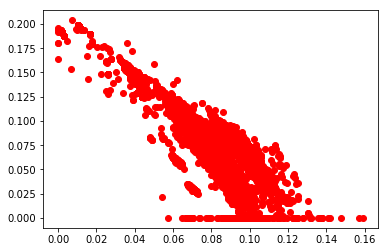

In [46]:
plt.plot(X[:,0],X[:,1], 'ro' )

# 把label為0的sha1都取出來

In [51]:
sha1list = dfiuse['sha1']
sha1list[kmff.labels_==0]

0        00034ba766f8721f43999bbfa341969fac85fdfe
3        0019d715f0f3ab076ba01946ab33b510d697a204
4        001bebfb7878aa60c9c261827b0fcfb1ef5d9350
6        00223d97e49c15dfe6d2bb41bc49cc27eae0e9da
8        002f2ea80a675231c4392c5b338a9710d4463b7b
9        003dce457da9125e95f71d6df3b7224183228ce6
12       00481ea9c5f7449c55d6f38154c253ee99bdaa01
14       004a9711a5f484c84d22239fa93ac31caf59d2ea
15       0052fddfae4d346ef8348827c78da697ae4d1388
16       005d362f39005e759c7f7e648a6366d85184c744
17       006be11e185566b30e0cdfb3a277a84d622187ac
18       00724a6fa856016f98006346f65edf308753e341
19       007436ab448b766edbeb1c5245c8564dabcfe1e8
20       0076ad9b2c2c30912a1a045b9233c3fd1c113dcb
22       00788c9d804f7a5bea013ff81ddd4112161586b1
24       0084687a1c66430887ee96cec2027d38ddc30843
25       008645861c002597bfa402aa350b82222a08cc87
26       00867e9eb5d7089b24cba56b0831c4b924f61160
28       00952ddb12ecf1b0abd9a6d4dd7d0eac3dc652cf
29       009853bccbf51fabaee8280260e8ff00391657e3


# 有truth的

In [74]:
zeg = {'00ac1a2eb8cfee4e3d36190309768154bba0c922', '02dfb0acf11e84ec9052e61ed23264e41309395c',  '02e405722cc936e3241e514d9f3ff91812d2b413',  '030e716a492085f2b45b212f61512ae2b0dafeca',  '03214459440feff531bd3187ca981a104de9c137',  '0341038e930c49d0ba2afb1afee93696e8a916ee',  '02f53dccaa67d3e5144a6af659840a15b61e3e1b'}

In [75]:
dip = {'00adec6a2cae04d4775cdf43d46652f123b9b502',\
       '00223d97e49c15dfe6d2bb41bc49cc27eae0e9da',\
       '026c62eafd076c04617e084f9216aebd593a768f',\
       '02985f4076d6e4b4b4fdf0141c7171e887377f1b',\
       '02cceb4129366347fb493d69d538b3eec855de5d'}

In [76]:
sven = {'00034ba766f8721f43999bbfa341969fac85fdfe',\
       '004a9711a5f484c84d22239fa93ac31caf59d2ea',\
       '0076ad9b2c2c30912a1a045b9233c3fd1c113dcb',\
       '00df5b9333954b4f4beaa8be4dc7374c0af4caf2',\
       '005d362f39005e759c7f7e648a6366d85184c744'}

In [77]:
crypt = {'00785a92f2e91a2b1cf185c4ca84d2841af447b9',\
       '00fa0d47c35ae7baa5510cd4786d94d30ff4f6fa',\
       '02e81a7cb55a956ef6b1499d4d3d56d4fbd2e818'}

In [78]:
alla = {'00acffc5820792e06dd67b46c93f48d1082d8e65',\
       '00036d496f906107c2943b2f38fa9a65888c0e5f',\
       '00445f1d646250bb383b587e37b1ab76fb02a7cd',\
       '004950b412188d2e53d2b3b5ae965faf6e9f45ee',\
       '00b6727ea254a757dc06112ba5ce9121b84d6b2e',\
       '00ce2ff9017c270a6bca471f34ebcba12c9eab36'}

In [79]:
ram = {'00e2453df8783bf0fe5c3df9dc51f66762e7d506',\
       '00dc44a6ebe2ebac0e38f18d02d5293c5eb2866d',\
       '00dc4bbef2db3216b08e1b9c7fb9cf364a813ee8',\
       '00bbaf33ce6eb50b56f210b88572ddbd61fab81a',\
       '009e067c381d1825348904cd81d7e838df3bfe27',\
       '00a4ca69715f25840da68f3a8e454374bfc8f548',\
      '0025b66c923168bf934d6ea74f64cd68511cfc18'}

In [80]:
fyn = {'00e2453df8783bf0fe5c3df9dc51f66762e7d506',\
       '00dc44a6ebe2ebac0e38f18d02d5293c5eb2866d',\
       '00dc4bbef2db3216b08e1b9c7fb9cf364a813ee8',\
       '00bbaf33ce6eb50b56f210b88572ddbd61fab81a',\
       '009e067c381d1825348904cd81d7e838df3bfe27',\
       '00a4ca69715f25840da68f3a8e454374bfc8f548',\
      '0025b66c923168bf934d6ea74f64cd68511cfc18'}

In [81]:
bro = {'00724a6fa856016f98006346f65edf308753e341',\
       '007436ab448b766edbeb1c5245c8564dabcfe1e8',\
       '00788c9d804f7a5bea013ff81ddd4112161586b1',\
       '00952ddb12ecf1b0abd9a6d4dd7d0eac3dc652cf',\
       '009853bccbf51fabaee8280260e8ff00391657e3',\
       '00987d3c3c1aeffa7983a727f8f3f3af0aba9d0d',\
      '00f1976d108daf1400bc103474adf7cf1ee80fba'}

# 把Truth做出來 在跟原本的做比較

In [187]:
cluster_list = [zeg,dip,sven,crypt,alla,ram,fyn,bro]
cluster_string_list = ['zeg','dip','sven','crypt','alla','ram','fyn','bro']
dfiuse['Truth'] = 'Nan'
for i in cluster_list:
    for k in i:
        fil = dfiuse.sha1.isin(i)
        dfiuse.loc[fil,'Truth'] = cluster_string_list[cluster_list.index(i)]

In [102]:
dfiuse

,TimeDateStamp,FileEntropy,OperatingSystemVersion,NumberOfSections,SubsystemVersion,SizeOfCode,sha1,SizeOfInitializedData,SizeOfImage,FileSize,Truth,Label
0,0.374273,0.960093,0.51,0.20,0.822581,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,0.000122,0.004538,0.021386,sven,0
1,0.000547,0.984663,0.40,0.10,0.645161,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,0.000011,0.001033,0.001989,alla,1
2,0.347545,0.778764,0.40,0.40,0.645161,0.000333,00141e38f00072e8854a8aeec7028456e54eb341,0.000021,0.004945,0.024825,Nan,2
3,0.373621,0.948082,0.51,0.25,0.822581,0.000082,0019d715f0f3ab076ba01946ab33b510d697a204,0.000138,0.004973,0.023666,Nan,0
4,0.373621,0.964731,0.51,0.20,0.822581,0.000082,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,0.000132,0.004945,0.022843,Nan,0
5,0.348736,0.827093,0.40,0.40,0.645161,0.000332,001c5920be0447c52c77b5673121f91167dae3e0,0.000021,0.004837,0.022442,Nan,2
6,0.345929,0.799037,0.51,0.20,0.822581,0.000162,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,0.000046,0.003179,0.015385,dip,0
7,0.252555,0.969570,0.40,0.25,0.645161,0.000017,0025b66c923168bf934d6ea74f64cd68511cfc18,0.000032,0.002473,0.006446,ram,2
8,0.373636,0.957827,0.51,0.25,0.822581,0.000082,002f2ea80a675231c4392c5b338a9710d4463b7b,0.000135,0.004864,0.023306,Nan,0
9,0.358318,0.797876,0.51,0.20,0.822581,0.000162,003dce457da9125e95f71d6df3b7224183228ce6,0.000046,0.003179,0.015310,Nan,0


In [91]:
dfiuse.Truth.value_counts()

Nan      17912
ram          7
zeg          7
bro          7
alla         6
sven         5
dip          5
crypt        3
Name: Truth, dtype: int64

# 取一名為Label的欄（自己判斷出來的）

In [186]:
dfiuse['Label'] = kmff.labels_

# 分類狀況

In [188]:
cluster_string_list = ['zeg','dip','sven','crypt','alla','ram','fyn','bro']
for i in cluster_string_list:
    print i,dfiuse.loc[dfiuse.Truth == i,'Label'].value_counts()

zeg 3    4
2    3
Name: Label, dtype: int64
dip 1    5
Name: Label, dtype: int64
sven 1    5
Name: Label, dtype: int64
crypt 3    3
Name: Label, dtype: int64
alla 0    6
Name: Label, dtype: int64
ram 1    4
3    3
Name: Label, dtype: int64
fyn Series([], Name: Label, dtype: int64)
bro 1    7
Name: Label, dtype: int64


In [189]:
dfiuse.Label.value_counts()

1    8700
3    4078
2    2676
0    2498
Name: Label, dtype: int64

In [190]:
len(kmff.labels_)

17952

# 補點

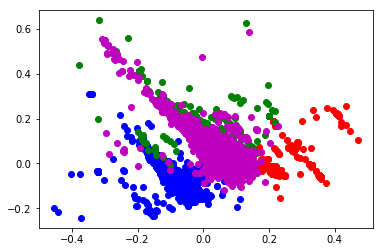

In [196]:
cluster1 = X[kmff.labels_==0]
x1 =  cluster1[:,0]
y1 = cluster1[:,1]
plt.plot(x1,y1,'ro')
cluster2 = X[kmff.labels_==1]
x2 = cluster2[:,0]
y2 = cluster2[:,1]
plt.plot(x2,y2,'bo')
cluster3 = X[kmff.labels_==2]
x3 = cluster3[:,0]
y3 = cluster3[:,1]
plt.plot(x3,y3,'go')
cluster4 = X[kmff.labels_==3]
x4 = cluster4[:,0]
y4 = cluster4[:,1]
plt.plot(x4,y4,'mo')

# 點有truth的

In [120]:
dfiuse.loc[dfiuse.Truth.isin(cluster_string_list),:]

,TimeDateStamp,FileEntropy,OperatingSystemVersion,NumberOfSections,SubsystemVersion,SizeOfCode,sha1,SizeOfInitializedData,SizeOfImage,FileSize,Truth,Label
0,0.374273,0.960093,0.51,0.20,0.822581,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,0.000122,0.004538,0.021386,sven,0
1,0.000547,0.984663,0.40,0.10,0.645161,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,0.000011,0.001033,0.001989,alla,1
6,0.345929,0.799037,0.51,0.20,0.822581,0.000162,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,0.000046,0.003179,0.015385,dip,0
7,0.252555,0.969570,0.40,0.25,0.645161,0.000017,0025b66c923168bf934d6ea74f64cd68511cfc18,0.000032,0.002473,0.006446,ram,2
11,0.000547,0.981816,0.40,0.10,0.645161,0.000008,00445f1d646250bb383b587e37b1ab76fb02a7cd,0.000011,0.001033,0.001989,alla,1
13,0.000547,0.983572,0.40,0.10,0.645161,0.000008,004950b412188d2e53d2b3b5ae965faf6e9f45ee,0.000011,0.001033,0.002126,alla,1
14,0.373932,0.960877,0.51,0.20,0.822581,0.000082,004a9711a5f484c84d22239fa93ac31caf59d2ea,0.000121,0.004755,0.021317,sven,0
16,0.373637,0.963730,0.51,0.20,0.822581,0.000082,005d362f39005e759c7f7e648a6366d85184c744,0.000133,0.005000,0.023014,sven,0
18,0.374860,0.815955,0.51,0.20,0.822581,0.000525,00724a6fa856016f98006346f65edf308753e341,0.000099,0.008913,0.044017,bro,0
19,0.374923,0.812743,0.51,0.20,0.822581,0.000551,007436ab448b766edbeb1c5245c8564dabcfe1e8,0.000100,0.009239,0.045645,bro,0


In [121]:
dftest.head()

,TimeDateStamp,FileEntropy,OperatingSystemVersion,NumberOfSections,SubsystemVersion,SizeOfCode,SizeOfInitializedData,SizeOfImage,FileSize
0,0.374273,0.960093,0.51,0.20,0.822581,0.000081,0.000122,0.004538,0.021386
1,0.000547,0.984663,0.40,0.10,0.645161,0.000008,0.000011,0.001033,0.001989
2,0.347545,0.778764,0.40,0.40,0.645161,0.000333,0.000021,0.004945,0.024825
3,0.373621,0.948082,0.51,0.25,0.822581,0.000082,0.000138,0.004973,0.023666
4,0.373621,0.964731,0.51,0.20,0.822581,0.000082,0.000132,0.004945,0.022843


In [123]:
kmff

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
dip = {'00adec6a2cae04d4775cdf43d46652f123b9b502',\
       '00223d97e49c15dfe6d2bb41bc49cc27eae0e9da',\
       '026c62eafd076c04617e084f9216aebd593a768f',\
       '02985f4076d6e4b4b4fdf0141c7171e887377f1b',\
       '02cceb4129366347fb493d69d538b3eec855de5d'}

In [76]:
sven = {'00034ba766f8721f43999bbfa341969fac85fdfe',\
       '004a9711a5f484c84d22239fa93ac31caf59d2ea',\
       '0076ad9b2c2c30912a1a045b9233c3fd1c113dcb',\
       '00df5b9333954b4f4beaa8be4dc7374c0af4caf2',\
       '005d362f39005e759c7f7e648a6366d85184c744'}

In [77]:
crypt = {'00785a92f2e91a2b1cf185c4ca84d2841af447b9',\
       '00fa0d47c35ae7baa5510cd4786d94d30ff4f6fa',\
       '02e81a7cb55a956ef6b1499d4d3d56d4fbd2e818'}

In [78]:
alla = {'00acffc5820792e06dd67b46c93f48d1082d8e65',\
       '00036d496f906107c2943b2f38fa9a65888c0e5f',\
       '00445f1d646250bb383b587e37b1ab76fb02a7cd',\
       '004950b412188d2e53d2b3b5ae965faf6e9f45ee',\
       '00b6727ea254a757dc06112ba5ce9121b84d6b2e',\
       '00ce2ff9017c270a6bca471f34ebcba12c9eab36'}

In [79]:
ram = {'00e2453df8783bf0fe5c3df9dc51f66762e7d506',\
       '00dc44a6ebe2ebac0e38f18d02d5293c5eb2866d',\
       '00dc4bbef2db3216b08e1b9c7fb9cf364a813ee8',\
       '00bbaf33ce6eb50b56f210b88572ddbd61fab81a',\
       '009e067c381d1825348904cd81d7e838df3bfe27',\
       '00a4ca69715f25840da68f3a8e454374bfc8f548',\
      '0025b66c923168bf934d6ea74f64cd68511cfc18'}

In [171]:
fyn = {'00e2453df8783bf0fe5c3df9dc51f66762e7d506',\
       '00dc44a6ebe2ebac0e38f18d02d5293c5eb2866d',\
       '00dc4bbef2db3216b08e1b9c7fb9cf364a813ee8',\
       '00bbaf33ce6eb50b56f210b88572ddbd61fab81a',\
       '009e067c381d1825348904cd81d7e838df3bfe27',\
       '00a4ca69715f25840da68f3a8e454374bfc8f548',\
      '0025b66c923168bf934d6ea74f64cd68511cfc18'}

In [81]:
bro = {'00724a6fa856016f98006346f65edf308753e341',\
       '007436ab448b766edbeb1c5245c8564dabcfe1e8',\
       '00788c9d804f7a5bea013ff81ddd4112161586b1',\
       '00952ddb12ecf1b0abd9a6d4dd7d0eac3dc652cf',\
       '009853bccbf51fabaee8280260e8ff00391657e3',\
       '00987d3c3c1aeffa7983a727f8f3f3af0aba9d0d',\
      '00f1976d108daf1400bc103474adf7cf1ee80fba'}

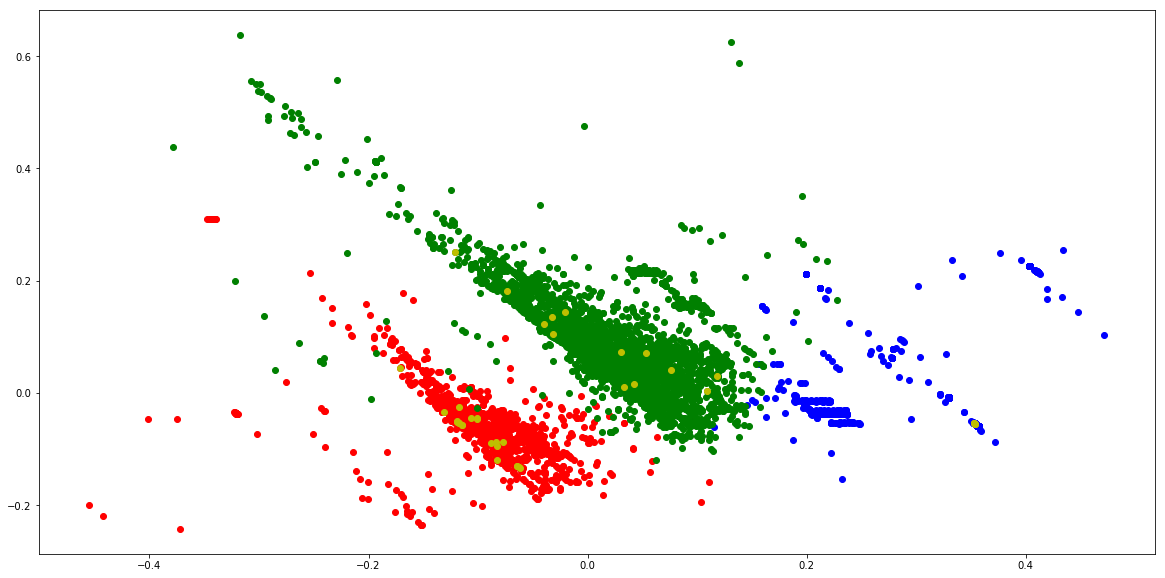

In [181]:
plt.figure(figsize = (20,10))
cluster1 = X[kmff.labels_==0]
x1 =  cluster1[:,0]
y1 = cluster1[:,1]
plt.plot(x1,y1,'ro')
cluster2 = X[kmff.labels_==1]
x2 = cluster2[:,0]
y2 = cluster2[:,1]
plt.plot(x2,y2,'bo')
cluster3 = X[kmff.labels_==2]
x3 = cluster3[:,0]
y3 = cluster3[:,1]
plt.plot(x3,y3,'go')
cluster_string_list = ['zeg','dip','sven','crypt','alla','ram','fyn','bro']
for i in cluster_string_list:
    fil = np.array(dfiuse.Truth ==i)
    clusteri = X[fil]
    xi = clusteri[:,0]
    yi = clusteri[:,1]
    plt.plot(xi,yi,'yo')

In [143]:
pd.DataFrame(X)[dfiuse.Truth =='zeg'].values

array([-0.07324274,  0.18156691])

In [151]:
X

array([[-0.0645459 , -0.13004954],
       [ 0.35350775, -0.05470437],
       [-0.06216603,  0.20794961],
       ..., 
       [-0.11290826, -0.06152738],
       [-0.13619353, -0.01252363],
       [-0.13125468, -0.03400635]])

In [159]:
kmff.labels_==1

array([False,  True, False, ..., False, False, False], dtype=bool)

In [174]:
# dfiuse.Truth == 'zeg'

In [175]:
# np.array(dfiuse.Truth == 'zeg')

In [172]:
# cluster_string_list = ['zeg','dip','sven','crypt','alla','ram','fyn','bro']
# plt.figure(figsize = (20,10))
# for i in cluster_string_list:
#     clusteri = X[dfiuse.Truth == i]
#     print clusteri.shape
#     xi = clusteri[:,0]
#     yi = clusteri[:,1]
#     plt.plot(xi,yi,'yo')

(7, 2)
(5, 2)
(5, 2)
(3, 2)
(6, 2)
(7, 2)
(0, 2)
(7, 2)


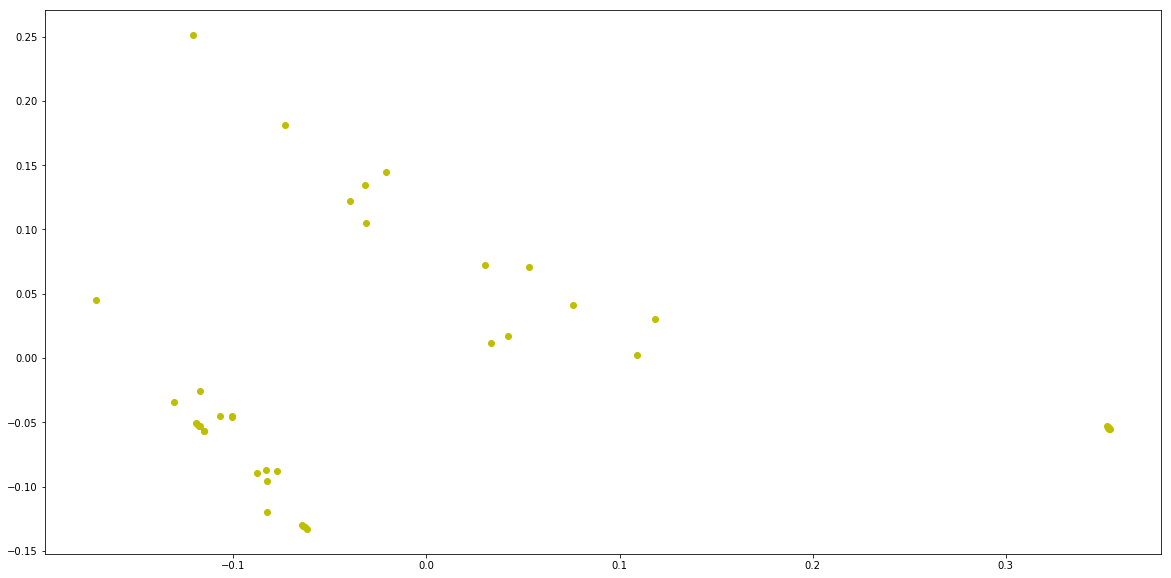

In [164]:
cluster_string_list = ['zeg','dip','sven','crypt','alla','ram','fyn','bro']
plt.figure(figsize = (20,10))
for i in cluster_string_list:
    fil = np.array(dfiuse.Truth ==i)
    clusteri = X[fil]
    print clusteri.shape
    xi = clusteri[:,0]
    yi = clusteri[:,1]
    plt.plot(xi,yi,'yo')

In [54]:
kmff.inertia_

380.84204020661326